In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


import requests
from PIL import Image
from io import BytesIO

import warnings
warnings.filterwarnings("ignore")

In [4]:
books_df=pd.read_csv("/content/drive/MyDrive/Almabetter/capstone projects/Book Recommendation System/Dataset/Books.csv")


In [5]:
ratings_df=pd.read_csv("/content/drive/MyDrive/Almabetter/capstone projects/Book Recommendation System/Dataset/Ratings.csv")
ratings_df.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [6]:
users_df=pd.read_csv("/content/drive/MyDrive/Almabetter/capstone projects/Book Recommendation System/Dataset/Users.csv")
users_df.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


##***Data Preprocessing*** and ***Exploratory Data Analysis***


**1. Books Dataset**

In [7]:
books_df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [8]:
books_df.shape

(271360, 8)

In [9]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [10]:
## Checking for null values
books_df.isnull().sum() 

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [11]:
list(books_df['Year-Of-Publication'].unique())


[2002,
 2001,
 1991,
 1999,
 2000,
 1993,
 1996,
 1988,
 2004,
 1998,
 1994,
 2003,
 1997,
 1983,
 1979,
 1995,
 1982,
 1985,
 1992,
 1986,
 1978,
 1980,
 1952,
 1987,
 1990,
 1981,
 1989,
 1984,
 0,
 1968,
 1961,
 1958,
 1974,
 1976,
 1971,
 1977,
 1975,
 1965,
 1941,
 1970,
 1962,
 1973,
 1972,
 1960,
 1966,
 1920,
 1956,
 1959,
 1953,
 1951,
 1942,
 1963,
 1964,
 1969,
 1954,
 1950,
 1967,
 2005,
 1957,
 1940,
 1937,
 1955,
 1946,
 1936,
 1930,
 2011,
 1925,
 1948,
 1943,
 1947,
 1945,
 1923,
 2020,
 1939,
 1926,
 1938,
 2030,
 1911,
 1904,
 1949,
 1932,
 1928,
 1929,
 1927,
 1931,
 1914,
 2050,
 1934,
 1910,
 1933,
 1902,
 1924,
 1921,
 1900,
 2038,
 2026,
 1944,
 1917,
 1901,
 2010,
 1908,
 1906,
 1935,
 1806,
 2021,
 '2000',
 '1995',
 '1999',
 '2004',
 '2003',
 '1990',
 '1994',
 '1986',
 '1989',
 '2002',
 '1981',
 '1993',
 '1983',
 '1982',
 '1976',
 '1991',
 '1977',
 '1998',
 '1992',
 '1996',
 '0',
 '1997',
 '2001',
 '1974',
 '1968',
 '1987',
 '1984',
 '1988',
 '1963',
 '1956',
 

In [12]:
pd.set_option('display.max_colwidth', -1)
books_df.loc[books_df['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [13]:
books_df.loc[books_df['Year-Of-Publication'] == 'Gallimard',:]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN


In [14]:
books_df.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books_df.at[209538 ,'Year-Of-Publication'] = 2000
books_df.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books_df.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'

books_df.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books_df.at[221678 ,'Year-Of-Publication'] = 2000
books_df.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books_df.at[209538 ,'Book-Author'] = 'James Buckley'

books_df.at[220731 ,'Publisher'] = 'Gallimard'
books_df.at[220731 ,'Year-Of-Publication'] = '2003'
books_df.at[209538 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
books_df.at[209538 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

<font color='blue'>As it can be seen from above that there are some incorrect entries in Year-Of-Publication field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as Year-Of-Publication in dataset due to some errors in csv file 

In [15]:
books_df['Year-Of-Publication']=pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')

print(sorted(books_df['Year-Of-Publication'].unique()))


[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


<font color='blue'>The value 0 for Year-Of_Publication is invalid and as this dataset was published in 2004, We have assumed that the years after 2006 to be 
invalid and setting invalid years as NaN

Reference of the fact: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

In [16]:
books_df.loc[(books_df['Year-Of-Publication'] > 2006) | (books_df['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

#replacing NaNs with median value of Year-Of-Publication
books_df['Year-Of-Publication'].fillna(round(books_df['Year-Of-Publication'].median()), inplace=True)

In [17]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [18]:
books_df.loc[books_df.Publisher.isnull(),:]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


In [19]:
books_df.Publisher.fillna('others',inplace=True)

In [20]:
books_df.loc[books_df['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995.0,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.LZZZZZZZ.jpg


In [21]:
books_df['Book-Author'].fillna('others',inplace=True)

In [22]:
books_df.loc[books_df['Image-URL-L'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,Peuple du ciel - Suivi de Les bergers,Jean-Marie Gustave Le ClÃ?Â©zio,2000.0,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,2003.0,Gallimard,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,2000.0,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [23]:
books_df['Image-URL-L'].fillna('others',inplace=True)

In [24]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [25]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271360 non-null  object 
 1   Book-Title           271360 non-null  object 
 2   Book-Author          271360 non-null  object 
 3   Year-Of-Publication  271360 non-null  float64
 4   Publisher            271360 non-null  object 
 5   Image-URL-S          271360 non-null  object 
 6   Image-URL-M          271360 non-null  object 
 7   Image-URL-L          271360 non-null  object 
dtypes: float64(1), object(7)
memory usage: 16.6+ MB


In [26]:
books_df.drop(['Image-URL-S','Image-URL-M'], axis=1, inplace=True)

**2. Ratings dataset**

In [27]:
ratings_df.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [28]:
## Checking for null values
ratings_df.isnull().sum() 

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [29]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [30]:
print("Shape of dataset before dropping",ratings_df.shape)
ratings_df = ratings_df[ratings_df.ISBN.isin(books_df.ISBN)]
print("shape of dataset after dropping",ratings_df.shape)

Shape of dataset before dropping (1149780, 3)
shape of dataset after dropping (1031136, 3)


In [31]:
ratings_df = ratings_df[ratings_df['Book-Rating'] != 0]
# implicit_ratings_df = ratings_df[ratings_df['Book-Rating'] == 0]

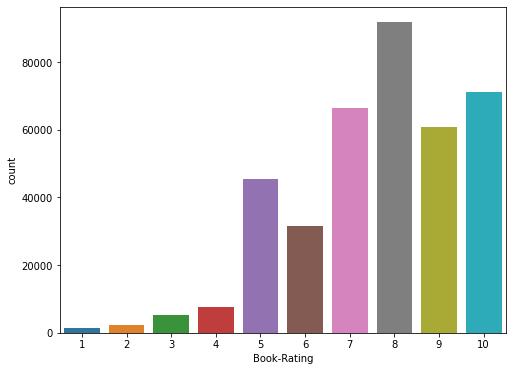

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(x="Book-Rating", data=ratings_df)

**3. Users Dataset**

In [33]:
users_df.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [34]:
users_df.isna().sum()

User-ID     0     
Location    0     
Age         110762
dtype: int64

In [35]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Text(0.5, 1.0, 'Find outlier data in Age column')

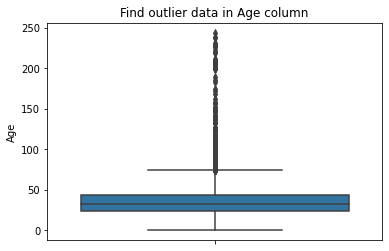

In [36]:
sns.boxplot(y='Age', data=users_df)
plt.title('Find outlier data in Age column')

In [37]:
# extreme = users_df[users_df['Age'] <= 80]
# extreme = extreme[extreme['Age'] >= 10]
median_value = round(users_df['Age'].median())   
users_df.loc[users_df['Age'] > 80, 'Age'] = median_value    #outliers with age grater than 80 are substituted with mean 
users_df.loc[users_df['Age'] < 10, 'Age'] = median_value   #outliers with age less than 10 years are substitued with mean


In [38]:
users_df['Age'] = users_df['Age'].fillna(median_value)      #filling null values with mean
users_df['Age'] = users_df['Age'].astype(int) 

In [39]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   User-ID   278858 non-null  int64 
 1   Location  278858 non-null  object
 2   Age       278858 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.4+ MB


Merge Datasets


In [40]:
temp=pd.merge(books_df,ratings_df,on='ISBN')


In [41]:
temp

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,8,5
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,11676,8
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,67544,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,116866,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,123629,9
...,...,...,...,...,...,...,...,...
383837,0395264707,Dreamsnake,Vonda N. McIntyre,1978.0,Houghton Mifflin,http://images.amazon.com/images/P/0395264707.01.LZZZZZZZ.jpg,275318,10
383838,1845170423,Cocktail Classics,David Biggs,2004.0,Connaught,http://images.amazon.com/images/P/1845170423.01.LZZZZZZZ.jpg,275970,7
383839,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993.0,Ballantine Books,http://images.amazon.com/images/P/0449906736.01.LZZZZZZZ.jpg,276313,5
383840,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988.0,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.01.LZZZZZZZ.jpg,276463,7


In [42]:

avg_ratings= pd.DataFrame(temp.groupby('ISBN')[['Book-Rating']].mean().reset_index().rename(columns = {'Book-Rating': 'Average-Rating'}))
ratings_count= pd.DataFrame(temp.groupby('ISBN')['Book-Rating'].count().reset_index().rename(columns = {'Book-Rating': 'Book-Rating-Count'}))


In [43]:
ratings_df =pd.merge(ratings_df, avg_ratings, on='ISBN')
ratings_df = pd.merge(ratings_df,ratings_count, on='ISBN')


In [44]:
temp2= pd.merge(books_df,ratings_df,on='ISBN')


In [45]:
temp2

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating,Average-Rating,Book-Rating-Count
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,8,5,7.666667,9
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,11676,8,7.666667,9
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,67544,8,7.666667,9
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,116866,9,7.666667,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,123629,9,7.666667,9
...,...,...,...,...,...,...,...,...,...,...
383837,0395264707,Dreamsnake,Vonda N. McIntyre,1978.0,Houghton Mifflin,http://images.amazon.com/images/P/0395264707.01.LZZZZZZZ.jpg,275318,10,10.000000,1
383838,1845170423,Cocktail Classics,David Biggs,2004.0,Connaught,http://images.amazon.com/images/P/1845170423.01.LZZZZZZZ.jpg,275970,7,7.000000,1
383839,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993.0,Ballantine Books,http://images.amazon.com/images/P/0449906736.01.LZZZZZZZ.jpg,276313,5,5.000000,1
383840,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988.0,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.01.LZZZZZZZ.jpg,276463,7,7.000000,1


In [46]:
data= pd.merge(temp2,users_df,on='User-ID')


In [47]:
data

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating,Average-Rating,Book-Rating-Count,Location,Age
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,8,5,7.666667,9,"timmins, ontario, canada",32
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,http://images.amazon.com/images/P/074322678X.01.LZZZZZZZ.jpg,8,5,5.000000,1,"timmins, ontario, canada",32
2,0887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,http://images.amazon.com/images/P/0887841740.01.LZZZZZZZ.jpg,8,5,5.000000,1,"timmins, ontario, canada",32
3,1552041778,Jane Doe,R. J. Kaiser,1999.0,Mira Books,http://images.amazon.com/images/P/1552041778.01.LZZZZZZZ.jpg,8,5,5.000000,1,"timmins, ontario, canada",32
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.01.LZZZZZZZ.jpg,8,6,6.000000,1,"timmins, ontario, canada",32
...,...,...,...,...,...,...,...,...,...,...,...,...
383837,8441407487,Sobre La Utilidad y Los Perjuicios de La Historia,Friedrich Wilhelm Nietzsche,2000.0,Edaf,http://images.amazon.com/images/P/8441407487.01.LZZZZZZZ.jpg,246590,6,6.000000,1,"madrid, madrid, spain",20
383838,087004124X,Anthem,Ayn Rand,1966.0,Caxton Press,http://images.amazon.com/images/P/087004124X.01.LZZZZZZZ.jpg,259589,8,8.000000,1,"venice, florida, usa",19
383839,158243123X,A Student of Weather,Elizabeth Hay,2001.0,Counterpoint Press,http://images.amazon.com/images/P/158243123X.01.LZZZZZZZ.jpg,259591,8,8.000000,1,"tioga, pennsylvania, usa",39
383840,8485900057,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),Gustavo Adolfo BÃ©cquer,1981.0,Ediciones Fraile,http://images.amazon.com/images/P/8485900057.01.LZZZZZZZ.jpg,259614,10,10.000000,1,"madrid, madrid, spain",22


In [48]:
data['Country']= [(i.split(',')[2]) for i in data['Location']]
data['State']= [(i.split(',')[1]) for i in data['Location']]


In [49]:
data['Country'] = data['Country'].replace({" ":'Other',"":'Other', ' n/a':'Other',  '\\"n/a\\""' :'Other'})
data['State'] = data['State'].replace({" ":'Other', "":'Other',' n/a':'Other',  '\\"n/a\\""' :'Other'})

In [50]:
data.drop(['Location'], axis=1,inplace=True)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383842 entries, 0 to 383841
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 383842 non-null  object 
 1   Book-Title           383842 non-null  object 
 2   Book-Author          383842 non-null  object 
 3   Year-Of-Publication  383842 non-null  float64
 4   Publisher            383842 non-null  object 
 5   Image-URL-L          383842 non-null  object 
 6   User-ID              383842 non-null  int64  
 7   Book-Rating          383842 non-null  int64  
 8   Average-Rating       383842 non-null  float64
 9   Book-Rating-Count    383842 non-null  int64  
 10  Age                  383842 non-null  int64  
 11  Country              383842 non-null  object 
 12  State                383842 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 41.0+ MB


Text(0.5, 1.0, 'No of books by an author (Top 15)')

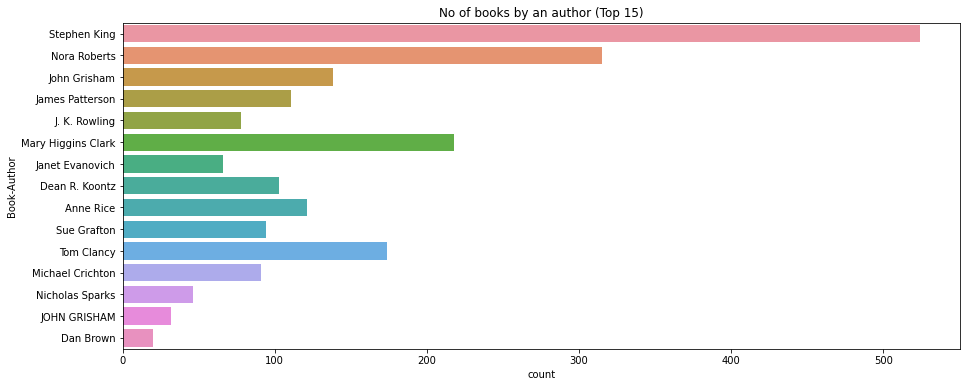

In [52]:
plt.figure(figsize=(15,6))
sns.countplot(y="Book-Author", data=books_df, order=data['Book-Author'].value_counts().index[0:15])
plt.title("No of books by an author (Top 15)")

Text(0.5, 1.0, 'No of books published in particular year (Top 15)')

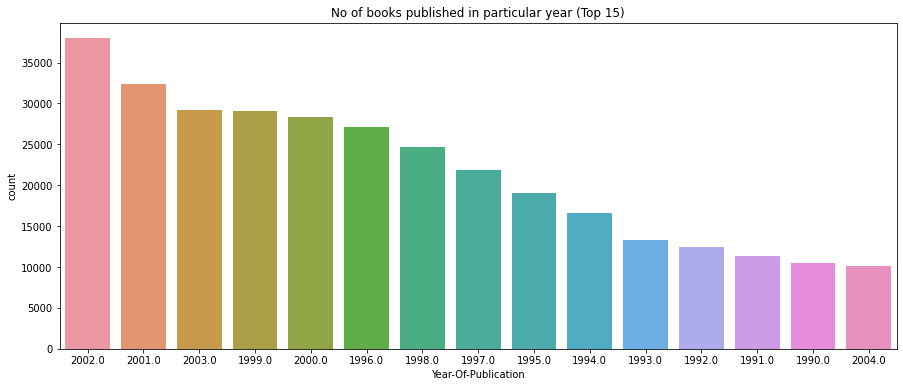

In [53]:
plt.figure(figsize=(15,6))
sns.countplot(x="Year-Of-Publication", data=data, order=data['Year-Of-Publication'].value_counts().index[0:15])
plt.title("No of books published in particular year (Top 15)")

Text(0.5, 1.0, 'No of books published in particular year (Top 15)')

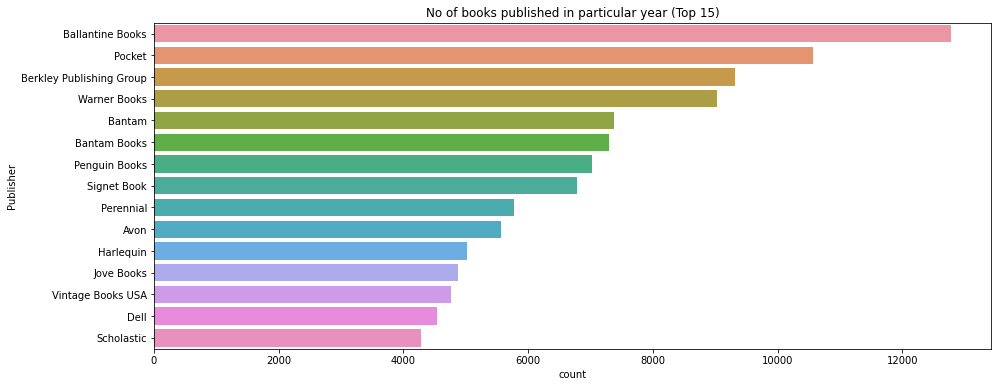

In [54]:
plt.figure(figsize=(15,6))
sns.countplot(y="Publisher", data=data, order=data['Publisher'].value_counts().index[0:15])
plt.title("No of books published in particular year (Top 15)")

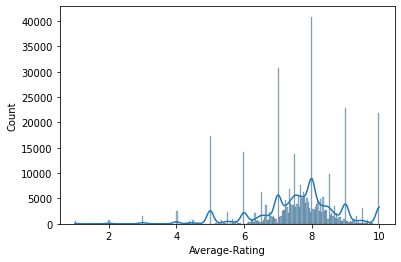

In [55]:
sns.histplot(data=data, x='Average-Rating',kde=True)

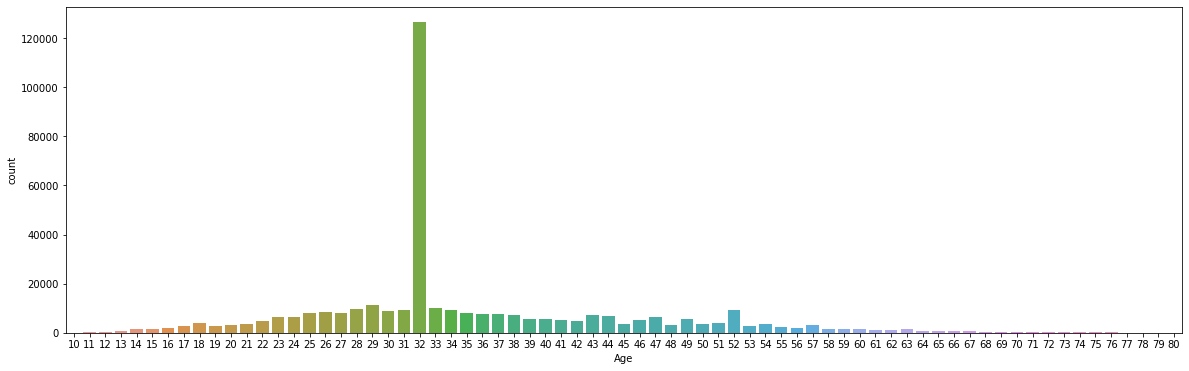

In [56]:
plt.figure(figsize=(20,6))
sns.countplot(x="Age", data=data)

Text(0.5, 1.0, 'No of books published in particular year (Top 15)')

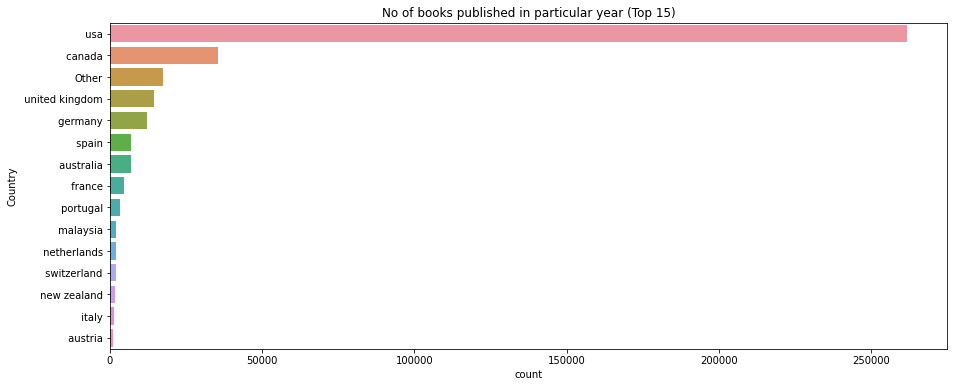

In [57]:
plt.figure(figsize=(15,6))
sns.countplot(y="Country", data=data, order=data['Country'].value_counts().index[0:15])
plt.title("No of books published in particular year (Top 15)")

In [58]:
#grouby neighbourhood groups and find number of reviews per group. Arranged in decreasing fashion of reviews
areas_reviews = data.groupby(['Country'])['Book-Rating'].sum().reset_index().sort_values(by = 'Book-Rating', ascending = False)[:5]
areas_reviews.head(5)

,Country,Book-Rating
319,usa,2010028
54,canada,266946
342,Other,130720
307,united kingdom,110426
109,germany,90116


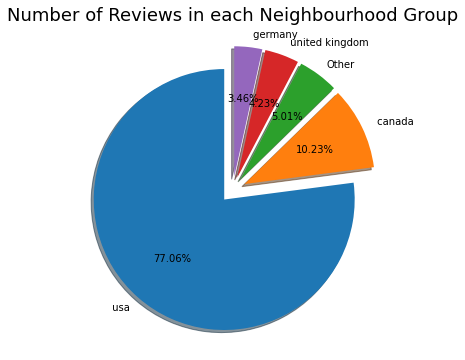

In [59]:
plt.rcParams['figure.figsize'] = (10,6)
reviews = areas_reviews['Book-Rating'][:5]
plt.pie(reviews, labels = areas_reviews['Country'], autopct ='%0.2f%%', startangle =90, explode = [0.1,0.1,0.1,0.1,0.1], shadow = True )
plt.title('Number of Reviews in each Neighbourhood Group', {'fontsize': 18})
plt.show()

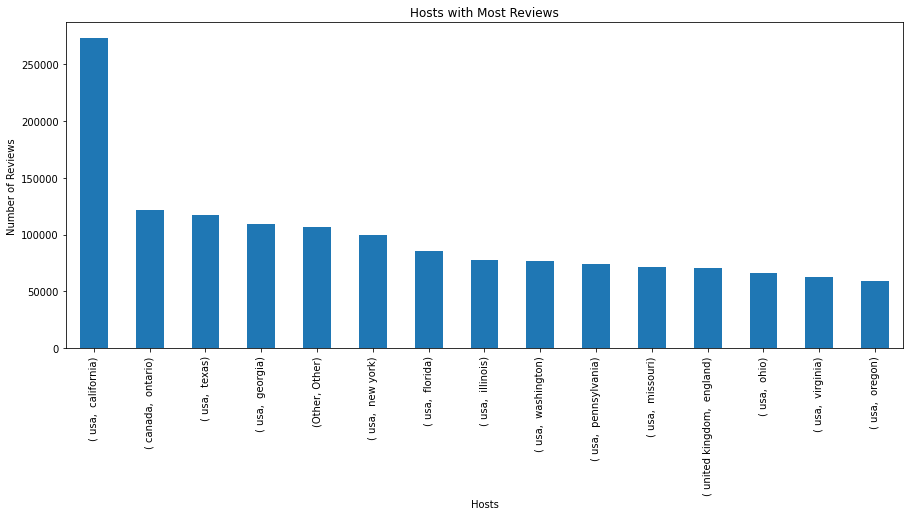

In [60]:
#sort the dataset based on # reviews 
highest_reviews = data.groupby(['Country', 'State'])['Book-Rating'].sum().sort_values(ascending=False)[:15]
highest_reviews.plot.bar(figsize=(15,6))
plt.xlabel('Hosts')
plt.ylabel('Number of Reviews')
plt.title('Hosts with Most Reviews');

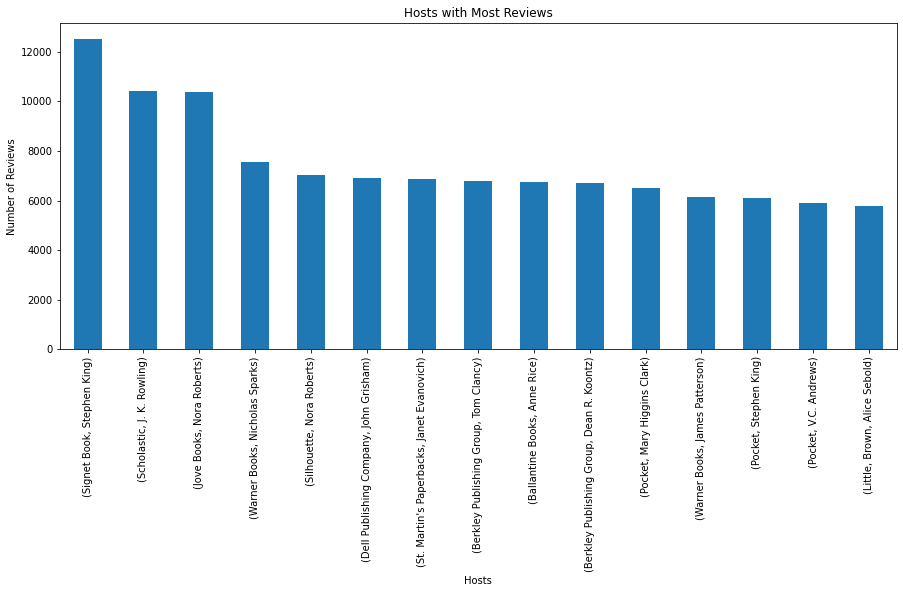

In [61]:
#sort the dataset based on # reviews 
highest_reviews = data.groupby(['Publisher', 'Book-Author'])['Book-Rating'].sum().sort_values(ascending=False)[:15]
highest_reviews.plot.bar(figsize=(15,6))
plt.xlabel('Hosts')
plt.ylabel('Number of Reviews')
plt.title('Hosts with Most Reviews');

# ***Recommenders***


In [62]:
data

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating,Average-Rating,Book-Rating-Count,Age,Country,State
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,8,5,7.666667,9,32,canada,ontario
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,http://images.amazon.com/images/P/074322678X.01.LZZZZZZZ.jpg,8,5,5.000000,1,32,canada,ontario
2,0887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,http://images.amazon.com/images/P/0887841740.01.LZZZZZZZ.jpg,8,5,5.000000,1,32,canada,ontario
3,1552041778,Jane Doe,R. J. Kaiser,1999.0,Mira Books,http://images.amazon.com/images/P/1552041778.01.LZZZZZZZ.jpg,8,5,5.000000,1,32,canada,ontario
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.01.LZZZZZZZ.jpg,8,6,6.000000,1,32,canada,ontario
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383837,8441407487,Sobre La Utilidad y Los Perjuicios de La Historia,Friedrich Wilhelm Nietzsche,2000.0,Edaf,http://images.amazon.com/images/P/8441407487.01.LZZZZZZZ.jpg,246590,6,6.000000,1,20,spain,madrid
383838,087004124X,Anthem,Ayn Rand,1966.0,Caxton Press,http://images.amazon.com/images/P/087004124X.01.LZZZZZZZ.jpg,259589,8,8.000000,1,19,usa,florida
383839,158243123X,A Student of Weather,Elizabeth Hay,2001.0,Counterpoint Press,http://images.amazon.com/images/P/158243123X.01.LZZZZZZZ.jpg,259591,8,8.000000,1,39,usa,pennsylvania
383840,8485900057,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),Gustavo Adolfo BÃ©cquer,1981.0,Ediciones Fraile,http://images.amazon.com/images/P/8485900057.01.LZZZZZZZ.jpg,259614,10,10.000000,1,22,spain,madrid


In [63]:
data_required = data.groupby('ISBN').first().reset_index()


In [64]:
data_required

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L,User-ID,Book-Rating,Average-Rating,Book-Rating-Count,Age,Country,State
0,0000913154,The Way Things Work: An Illustrated Encyclopedia of Technology,C. van Amerongen (translator),1967.0,Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.01.LZZZZZZZ.jpg,171118,8,8.0,1,47,canada,ontario
1,0001046438,Liar,Stephen Fry,1996.0,Harpercollins Uk,http://images.amazon.com/images/P/0001046438.01.LZZZZZZZ.jpg,23902,9,9.0,1,32,united kingdom,england
2,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other Poems""",T.S. Eliot,1993.0,HarperCollins Publishers,http://images.amazon.com/images/P/000104687X.01.LZZZZZZZ.jpg,23902,6,6.0,1,32,united kingdom,england
3,0001047213,The Fighting Man,Gerald Seymour,1993.0,HarperCollins Publishers,http://images.amazon.com/images/P/0001047213.01.LZZZZZZZ.jpg,23902,9,9.0,1,32,united kingdom,england
4,0001047973,Brave New World,Aldous Huxley,1999.0,Trafalgar Square Publishing,http://images.amazon.com/images/P/0001047973.01.LZZZZZZZ.jpg,23902,9,9.0,2,32,united kingdom,england
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149831,B0001FZGPI,The Bonesetter's Daughter,Amy Tan,2001.0,Putnam Pub Group,http://images.amazon.com/images/P/B0001FZGPI.01.LZZZZZZZ.jpg,222207,7,7.0,1,26,canada,ontario
149832,B0001FZGRQ,The Clan of the Cave Bear,Jean M. Auel,2001.0,Crown Publishing Group,http://images.amazon.com/images/P/B0001FZGRQ.01.LZZZZZZZ.jpg,192093,9,9.0,1,46,usa,florida
149833,B0001GMSV2,Find Me,Rosie O'Donnell,2002.0,Warner Books,http://images.amazon.com/images/P/B0001GMSV2.01.LZZZZZZZ.jpg,24194,8,8.0,2,20,usa,illinois
149834,B0001I1KOG,New York Public Library Literature Companion,New York Public Library,2001.0,Free Press,http://images.amazon.com/images/P/B0001I1KOG.01.LZZZZZZZ.jpg,148258,10,10.0,1,32,canada,ontario


#### 1. **Popular Recommendation**

In [65]:
def show_books(dataframe):
   for i in dataframe['Image-URL-L']:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        plt.figure()
        plt.imshow(img)

In [71]:
def popularity_based_recommender(dataframe, n):
      popularity_threshold = n
      # ratings_count= pd.DataFrame(dataframe.groupby('ISBN')['Book-Rating'].count().reset_index().rename(columns = {'Book-Rating': 'Book-Rating-Count'}))
      # most_rated= pd.DataFrame(dataframe[dataframe['Book-Rating-Count'] >= popularity_threshold]).sort_values(by='Average-Rating',ascending=False)
      most_rated=dataframe[dataframe['Book-Rating-Count'] >= popularity_threshold]
      result= most_rated.groupby('Book-Title', as_index=False).first().sort_values(by='Average-Rating',ascending=False)
      show_books(result)
      result=result[['Book-Title', 'Book-Author','Publisher', 'Average-Rating','Book-Rating-Count']].reset_index(drop=True) #.style.set_properties(**{'text-align': 'left'})

      return result


,Book-Title,Book-Author,Publisher,Average-Rating,Book-Rating-Count
0,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,Arthur A. Levine Books,8.939297,313
1,The Secret Life of Bees,Sue Monk Kidd,Penguin Books,8.452769,307
2,The Da Vinci Code,Dan Brown,Doubleday,8.435318,487
3,The Lovely Bones: A Novel,Alice Sebold,"Little, Brown",8.185290,707
4,The Red Tent (Bestselling Backlist),Anita Diamant,Picador USA,8.182768,383
5,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,Perennial,7.887500,320
6,Wild Animus,Rich Shapero,Too Far,4.390706,581


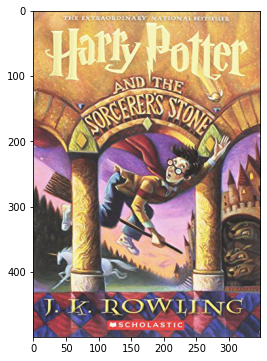

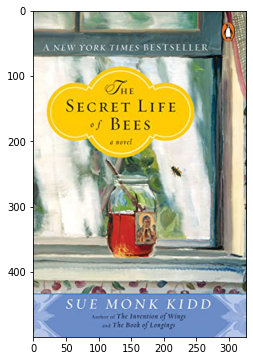

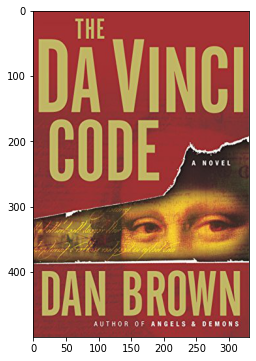

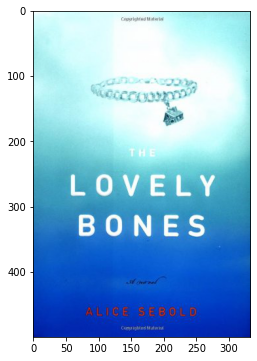

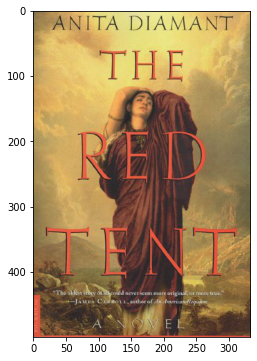

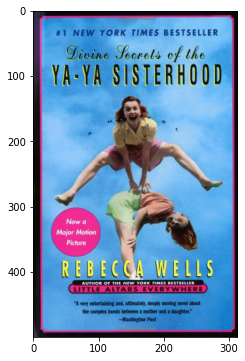

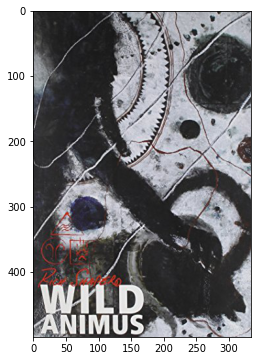

In [77]:
popularity_based_recommender(data,300)
# result['Book-Title'].unique

In [73]:
data['ISBN'].nunique()

149836

In [74]:
def weighted_average_recommender(dataframe,n):

  v=dataframe['Book-Rating-Count']
  R=dataframe['Average-Rating']
  C=dataframe['Average-Rating'].mean()
  m=dataframe['Book-Rating-Count'].quantile(0.90)
  dataframe['Weighted-Average-Score']=  ((R*v)+ (C*m))/(v+m)
  top_dataframe= dataframe.loc[data['Book-Rating-Count'] >= m]

  # dataframe=top_dataframe.sort_values('Weighted-Average-Score',ascending=False).drop_duplicates('ISBN')

  dataframe= top_dataframe.groupby('Book-Title', as_index=False).first().sort_values(by='Weighted-Average-Score',ascending=False)

  show_books(dataframe.head(n))
  dataframe=dataframe[['Book-Title', 'Book-Author','Publisher','Average-Rating','Book-Rating-Count', 'Weighted-Average-Score']].reset_index(drop=True).head(n) #.style.set_properties(**{'text-align': 'left'})
  return dataframe



,Book-Title,Book-Author,Publisher,Average-Rating,Book-Rating-Count,Weighted-Average-Score
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,Scholastic,9.262774,137,8.741835
1,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,Arthur A. Levine Books,8.939297,313,8.716469
2,Harry Potter and the Order of the Phoenix (Book 5),J. K. Rowling,Scholastic,9.033981,206,8.700403
3,To Kill a Mockingbird,Harper Lee,Little Brown &amp; Company,8.943925,214,8.640679
4,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,Scholastic,9.082707,133,8.609690
5,"The Return of the King (The Lord of the Rings, Part 3)",J.R.R. TOLKIEN,Del Rey,9.402597,77,8.596517
6,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,Scholastic,8.983193,119,8.508791
7,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,Scholastic,8.783069,189,8.490549
8,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,Del Rey,9.120482,83,8.470128
9,"The Fellowship of the Ring (The Lord of the Rings, Part 1)",J.R.R. TOLKIEN,Del Rey,8.839695,131,8.441584


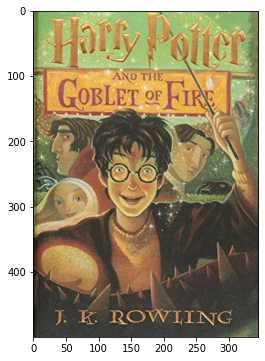

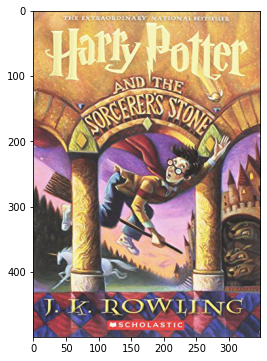

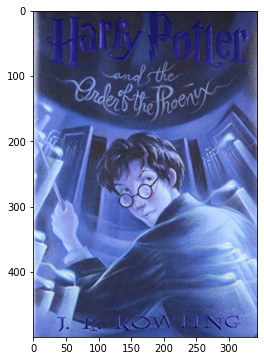

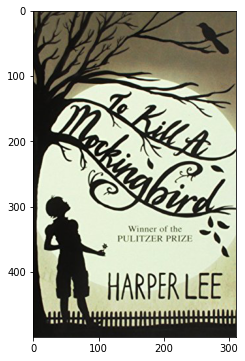

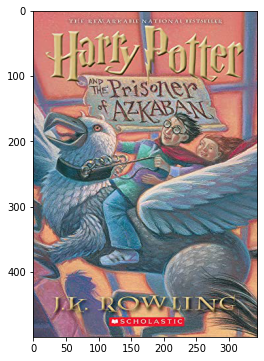

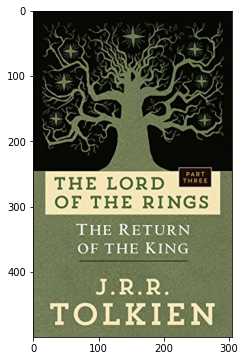

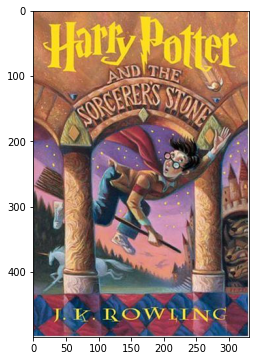

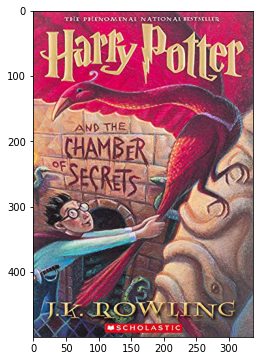

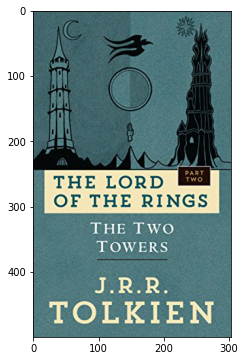

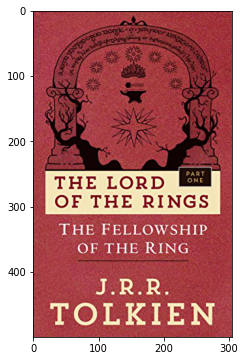

In [75]:
weighted_average_recommender(data,10)

In [1112]:
# def weighted_average_recommender(dataframe,n):

#   v=dataframe['Book-Rating-Count']
#   R=dataframe['Average-Rating']
#   C=dataframe['Average-Rating'].mean()
#   m=dataframe['Book-Rating-Count'].quantile(0.70)
#   dataframe['weighted_average']=  ((R*v)+ (C*m))/(v+m)

#   sorted_dataframe=dataframe.sort_values('weighted_average',ascending=False)

#   scaling=MinMaxScaler()
#   scaled_dataframe =scaling.fit_transform(sorted_dataframe[['weighted_average']])
#   normalized_dataframe=pd.DataFrame(scaled_dataframe,columns=['weighted_average'])
  
#   dataframe[['score(normalized-weighted-average-rating)']]=normalized_dataframe
#   dataframe=dataframe.sort_values(['score(normalized-weighted-average-rating)'], ascending=False)

#   # show_books(dataframe.head(n))
#   pd.set_option('display.max_colwidth', None)
#   dataframe=dataframe[['Book-Title', 'Book-Author','Publisher', 'score(normalized-weighted-average-rating)']].reset_index(drop=True).head(n) #.style.set_properties(**{'text-align': 'left'})
#   return dataframe

